 **New York City Taxi Fare Prediction**            
* Yakesh Choudhery


In [165]:
#A momentous collaboration during my internship at Yhills and IIT Hyderabad led to the development of the New York Taxi Fare Prediction Model.
#During my internship, I embarked on a remarkable solo journey that led to the creation of the New York Taxi Fare Prediction Model.
#The dataset we curated is now available at https://github.com/yakesh199/New_York_Taxi_fare_Prediction-Model/tree/, inviting knowledge seekers and innovators to explore its depths and be part of this transformative project.
#It is my hope that knowledge seekers and innovators alike will find value in exploring its depths and, perhaps, build upon this work to make even greater strides in the field of Machine Learning.

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

* Load the dataset and set number of rows as nrows =3900000

In [166]:
data=pd.read_csv("TaxiFare.csv",nrows = 3900000)
data.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [167]:
data.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [168]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


**fare amount column :-**
Found negative value of fare amount. Fare never be negative let's drop those rows which are having negative fare amount and also remove outliers

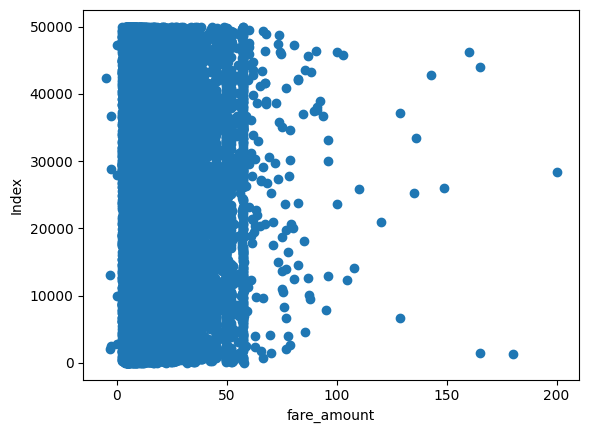

In [172]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Read the CSV file again, selecting only the desired columns
data = pd.read_csv("TaxiFare.csv", nrows=3900000, usecols=cols)

# Scatter plot
plt.scatter(x=data['amount'], y=data.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

In [176]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Read the CSV file again, selecting only the desired columns
data = pd.read_csv("TaxiFare.csv", nrows=3900000, usecols=cols)

# Check the count of fare amounts that are less than 0 or greater than or equal to 300
count_invalid_fares = data['amount'][(data['amount'] < 0) | (data['amount'] >= 300)].count()
print("Count of invalid fare amounts:", count_invalid_fares)

Count of invalid fare amounts: 6


In [177]:
data.shape

(50000, 7)

In [178]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Read the CSV file again, selecting only the desired columns
data = pd.read_csv("TaxiFare.csv", nrows=3900000, usecols=cols)

# Drop rows with invalid fare amounts (less than 0 or greater than or equal to 300)
data = data.drop(data[(data['amount'] < 0) | (data['amount'] >= 300)].index, axis=0)

# Check the count of rows after dropping the invalid fare amounts
print("Count of rows after dropping invalid fare amounts:", data.shape[0])

Count of rows after dropping invalid fare amounts: 49994


In [179]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Read the CSV file again, selecting only the desired columns
data = pd.read_csv("TaxiFare.csv", nrows=3900000, usecols=cols)

# Check the count of null values in the 'amount' column
count_null_fares = data['amount'].isnull().sum()
print("Count of null values in the 'amount' column:", count_null_fares)

Count of null values in the 'amount' column: 0


In [180]:
data.shape

(50000, 7)

data with negative fare_amount has been removed

--------------------------------------------------------


In [181]:
data.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [182]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Read the CSV file again, selecting only the desired columns
data = pd.read_csv("TaxiFare.csv", nrows=3900000, usecols=cols)

# Print the first 5 rows of 'latitude_of_pickup' and 'latitude_of_dropoff' columns
print(data['latitude_of_pickup'].head(5))
print(data['latitude_of_dropoff'].head(5))

0    40.721319
1    40.711303
2    40.761270
3    40.733143
4    40.768008
Name: latitude_of_pickup, dtype: float64
0    40.712278
1    40.782004
2    40.750562
3    40.758092
4    40.783762
Name: latitude_of_dropoff, dtype: float64


-------------------------------
Check test data latitude and longitude range for New your City (40° 42' 51" N / 74° 0' 23" W)

In [183]:
test_data=pd.read_csv('TaxiFare.csv')
test_data.head(5)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


longitude  max and min (test data)

In [186]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Read the CSV file again, selecting only the desired columns
test_data = pd.read_csv("TaxiFare.csv", nrows=3900000, usecols=cols)

# Get the minimum and maximum longitude values
lon_min = min(test_data['longitude_of_pickup'].min(), test_data['longitude_of_dropoff'].min())
lon_max = max(test_data['longitude_of_pickup'].max(), test_data['longitude_of_dropoff'].max())

print(lon_min, ',', lon_max)

-84.654241 , 40.851027


latitude max and min (test data)

In [187]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Read the CSV file again, selecting only the desired columns
test_data = pd.read_csv("TaxiFare.csv", nrows=3900000, usecols=cols)

# Filter out invalid latitude values (outside the range -90 to 90 degrees)
valid_latitude_mask = (test_data['latitude_of_pickup'].between(-90, 90)) & (test_data['latitude_of_dropoff'].between(-90, 90))
test_data = test_data[valid_latitude_mask]

# Get the minimum and maximum latitude values
lat_min = min(test_data['latitude_of_pickup'].min(), test_data['latitude_of_dropoff'].min())
lat_max = max(test_data['latitude_of_pickup'].max(), test_data['latitude_of_dropoff'].max())

print(lat_min, ',', lat_max)

-74.006893 , 43.41519


--------------------------------------------

In [192]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
train_data = train_data[cols]

# Filter out rows with invalid latitude values (pickup_latitude & dropoff_latitude within lat_min and lat_max)
valid_latitude_mask = (train_data['latitude_of_pickup'].between(lat_min, lat_max)) & (train_data['latitude_of_dropoff'].between(lat_min, lat_max))
train_data = train_data[valid_latitude_mask]

In [191]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
data = data[cols]

# Filter out rows with invalid latitude values (pickup_latitude & dropoff_latitude within lat_min and lat_max)
valid_latitude_mask = (data['latitude_of_pickup'].between(lat_min, lat_max)) & (data['latitude_of_dropoff'].between(lat_min, lat_max))
data = data[valid_latitude_mask]


In [193]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
data = data[cols]

# Filter out rows with invalid latitude values (dropoff_latitude within lat_min and lat_max)
valid_latitude_mask = (data['latitude_of_dropoff'].between(lat_min, lat_max))
data = data[valid_latitude_mask]

In [194]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
data = data[cols]

# Filter out rows with invalid dropoff latitude values (latitude_of_dropoff within lat_min and lat_max)
valid_latitude_mask = (data['latitude_of_dropoff'].between(lat_min, lat_max))
data = data[valid_latitude_mask]

In [195]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
data = data[cols]

# Filter out rows with invalid longitude values (pickup_longitude & dropoff_longitude within lon_min and lon_max)
valid_longitude_mask = (data['longitude_of_pickup'].between(lon_min, lon_max)) & (data['longitude_of_dropoff'].between(lon_min, lon_max))
data = data[valid_longitude_mask]


In [196]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
data = data[cols]

# Calculate the absolute values of pickup longitude and display the first 5 rows
data['abs_pickup_longitude'] = data['longitude_of_pickup'].abs()
print(data['abs_pickup_longitude'].head())

0    73.844311
1    74.016048
2    73.982738
3    73.987130
4    73.968095
Name: abs_pickup_longitude, dtype: float64


In [197]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
data = data[cols]

# Filter out rows with invalid pickup longitude values (longitude_of_pickup within lon_min and lon_max)
valid_longitude_mask = (data['longitude_of_pickup'].between(lon_min, lon_max))
data = data[valid_longitude_mask]


In [198]:
# Specify the correct columns to be used
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
data = data[cols]

# Filter out rows with invalid pickup longitude values (longitude_of_pickup within lon_min and lon_max)
valid_longitude_mask = (data['longitude_of_pickup'].between(lon_min, lon_max))
data = data[valid_longitude_mask]

In [199]:
cols = ['amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger']

# Select only the desired columns
data = data[cols]

# Filter out rows with invalid dropoff longitude values (longitude_of_dropoff within lon_min and lon_max)
valid_longitude_mask = (data['longitude_of_dropoff'].between(lon_min, lon_max))
data = data[valid_longitude_mask]

In [200]:
data.drop(data[(data.longitude_of_dropoff < lon_min) | (data.longitude_of_dropoff > lon_max)].index, axis=0, inplace=True)



let's see NaN Values now from both dropoff_longitude and dropoff_latitude .

In [201]:
data.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [203]:
# Check for missing values in the 'longitude_of_dropoff' column
missing_dropoff_longitude = data[data['longitude_of_dropoff'].isnull()]

# Display the first row where 'longitude_of_dropoff' is missing
print(missing_dropoff_longitude.head(1))

Empty DataFrame
Columns: [unique_id, amount, date_time_of_pickup, longitude_of_pickup, latitude_of_pickup, longitude_of_dropoff, latitude_of_dropoff, no_of_passenger]
Index: []


In [204]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [205]:
# Drop rows with missing values in the 'latitude_of_dropoff' column
data.drop(data[data['latitude_of_dropoff'].isnull()].index, axis=0, inplace=True)

In [206]:
print(data.columns)

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')


In [207]:
data.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


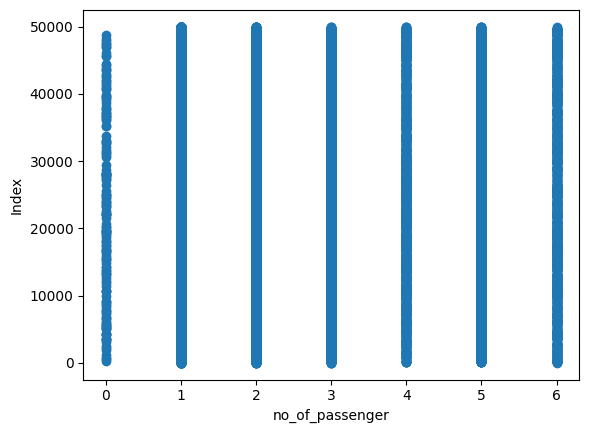

In [208]:
plt.scatter(x=data['no_of_passenger'], y=data.index)
plt.ylabel('Index')
plt.xlabel('no_of_passenger')
plt.show()

In [209]:
data['no_of_passenger'][data['no_of_passenger'] == 0].count()

165

In [210]:
print(data.shape)
data.drop(data[data['no_of_passenger'] == 0].index, axis=0, inplace=True)
print(data.shape)

(50000, 8)
(49835, 8)


Now,let's drop Outliers

In [212]:
print(data.shape)
data.drop(data[data['no_of_passenger'] > 8].index, axis=0, inplace=True)
print(data.shape)

(49835, 8)
(49835, 8)




```
# This is formatted as code
```

Data cleaning accomplished

In [213]:
data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [214]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])

# Check the data type and the first row of the 'date_time_of_pickup' column
print(data['date_time_of_pickup'].dtype)
print(data['date_time_of_pickup'].head(1))

datetime64[ns, UTC]
0   2009-06-15 17:26:21+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]


In [216]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'], infer_datetime_format=True)

In [217]:
data['date_time_of_pickup'].head(1)

0   2009-06-15 17:26:21+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]


split the datetime

In [218]:
data['year'] = data['date_time_of_pickup'].dt.year
data['Month'] = data['date_time_of_pickup'].dt.month
data['Date'] = data['date_time_of_pickup'].dt.day
data['Day of Week'] = data['date_time_of_pickup'].dt.dayofweek
data['Hour'] = data['date_time_of_pickup'].dt.hour
data['Minute'] = data['date_time_of_pickup'].dt.minute

**Distance find out**

Calculate the distance based on longitude and latitude

# The Haversine formula is as follows:

# a = sin^2(Δlat/2) + cos(lat1) * cos(lat2) * sin^2(Δlon/2)

# c = 2 * arcsin(a)

# Distance = Radius of Earth * c

# where:

# lat1 and lon1 are the latitude and longitude of the first point, respectively.

# lat2 and lon2 are the latitude and longitude of the second point, respectively.

# Δlat and Δlon are the differences in latitude and longitude between the two points, respectively.

# Radius of Earth is the radius of the Earth (usually taken as 6371 kilometers).

In [219]:
from math import radians, cos, sin, asin, sqrt
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [220]:
def haversine(df):
    # Convert latitude and longitude from degrees to radians
    lat1 = np.radians(df['latitude_of_pickup'])
    lon1 = np.radians(df['longitude_of_pickup'])
    lat2 = np.radians(df['latitude_of_dropoff'])
    lon2 = np.radians(df['longitude_of_dropoff'])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    distance = c * r

    return distance

data['distance'] = haversine(data)

In [221]:
data["distance"].head(5)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: distance, dtype: float64

In [222]:
#Analyze column distance ,and drop the rows if necessary to drop
data[data.distance==0].shape  # found records with 0 distnace

(1446, 15)

In [223]:
print(data.shape)
data.drop(data[data.distance==0].index,axis=0, inplace=True) # drop the rows having records of distance as 0
print(data.shape)

(49835, 15)
(48389, 15)


**Exploratory Data Analysis**

**1)Check the pickup date and time affect the fare or not**

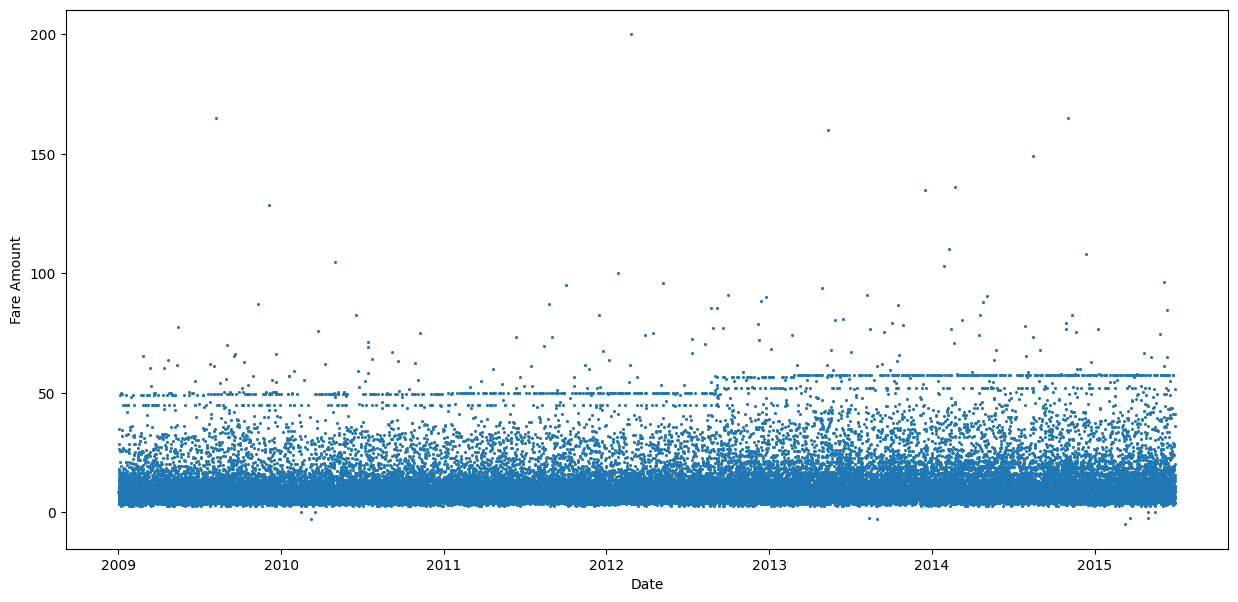

In [224]:
plt.figure(figsize=(15, 7))
plt.scatter(x=data['date_time_of_pickup'], y=data['amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare Amount')
plt.show()

The fares throught the month majority seem same


---





Text(0, 0.5, 'Frequency')

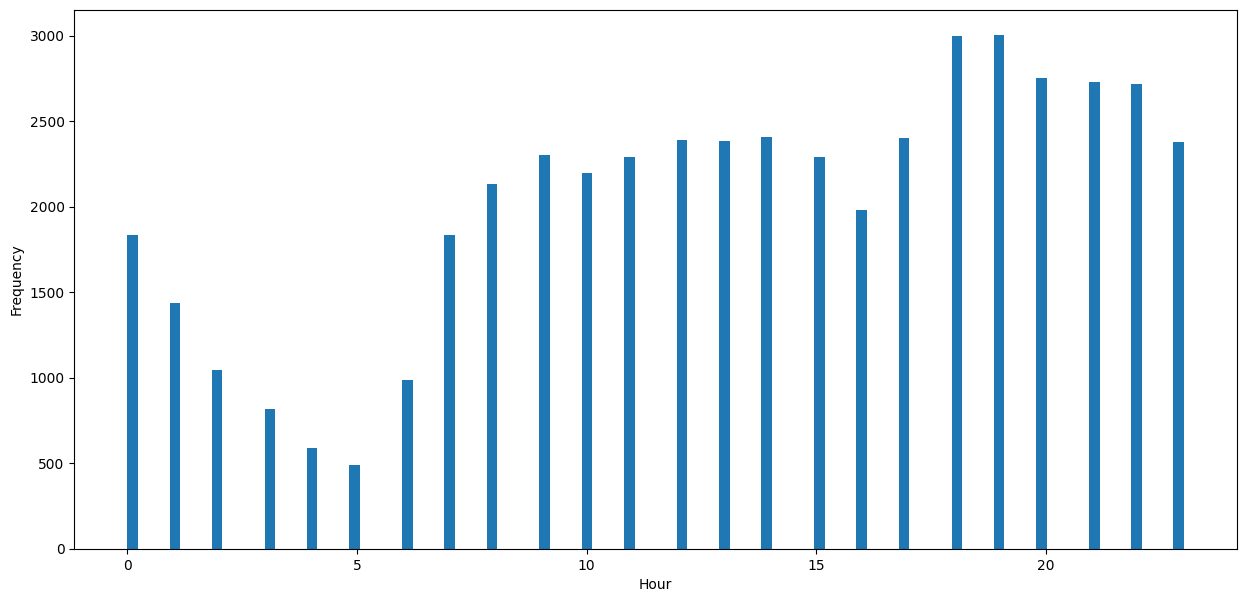

In [228]:
plt.figure(figsize=(15,7))
plt.hist(data['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

The frequency of cab rides seem to be the lowest at 5AM

Text(0, 0.5, 'Fare')

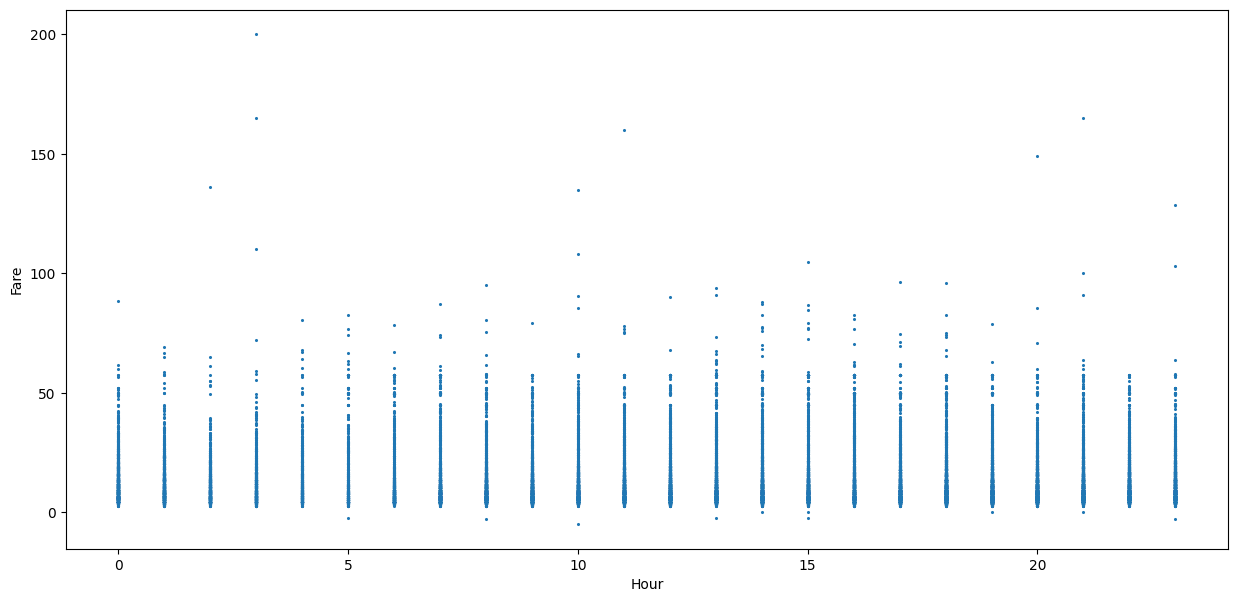

In [230]:
plt.figure(figsize=(15,7))
plt.scatter(x=data['Hour'], y=data['amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')


Number of passengers vs fare



Text(0, 0.5, 'Frequency')

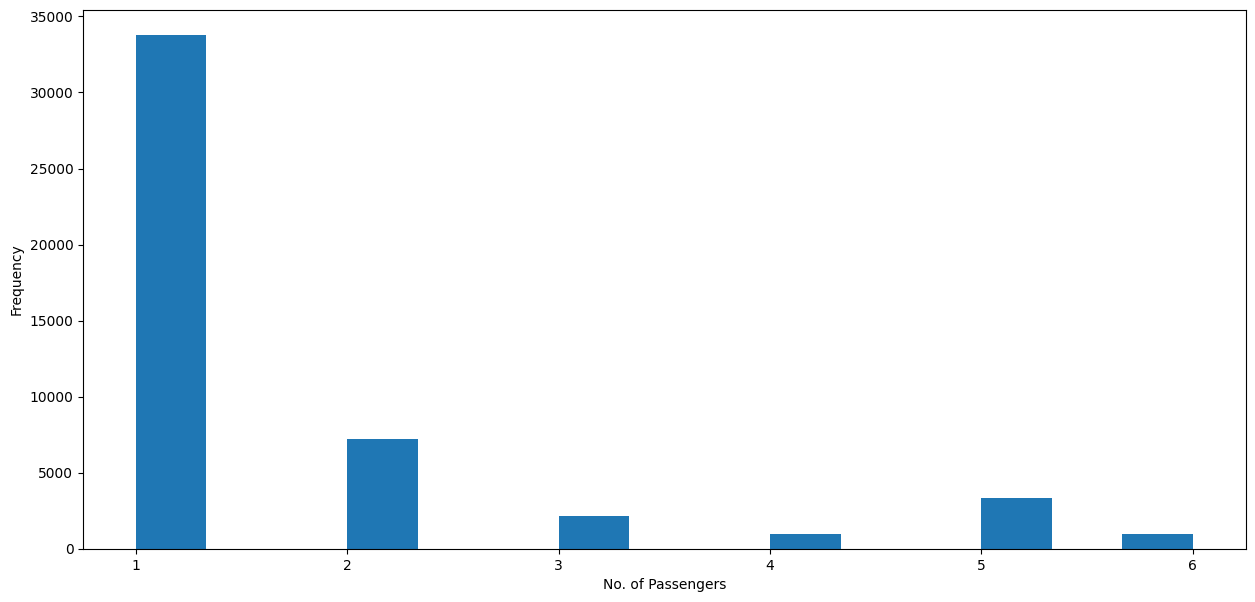

In [232]:
plt.figure(figsize=(15,7))
plt.hist(data['no_of_passenger'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')


Text(0, 0.5, 'Fare Amount')

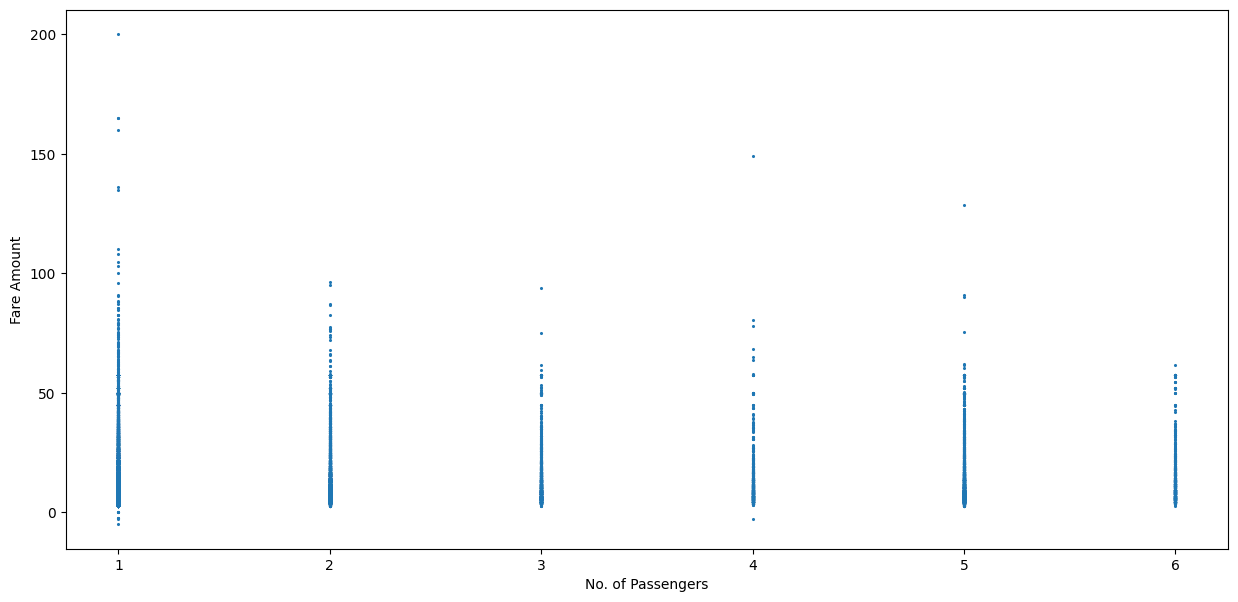

In [233]:
plt.figure(figsize=(15, 7))
plt.scatter(x=data['no_of_passenger'], y=data['amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare Amount')

single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

Does the day of the week affect the fare?

Text(0, 0.5, 'Frequency')

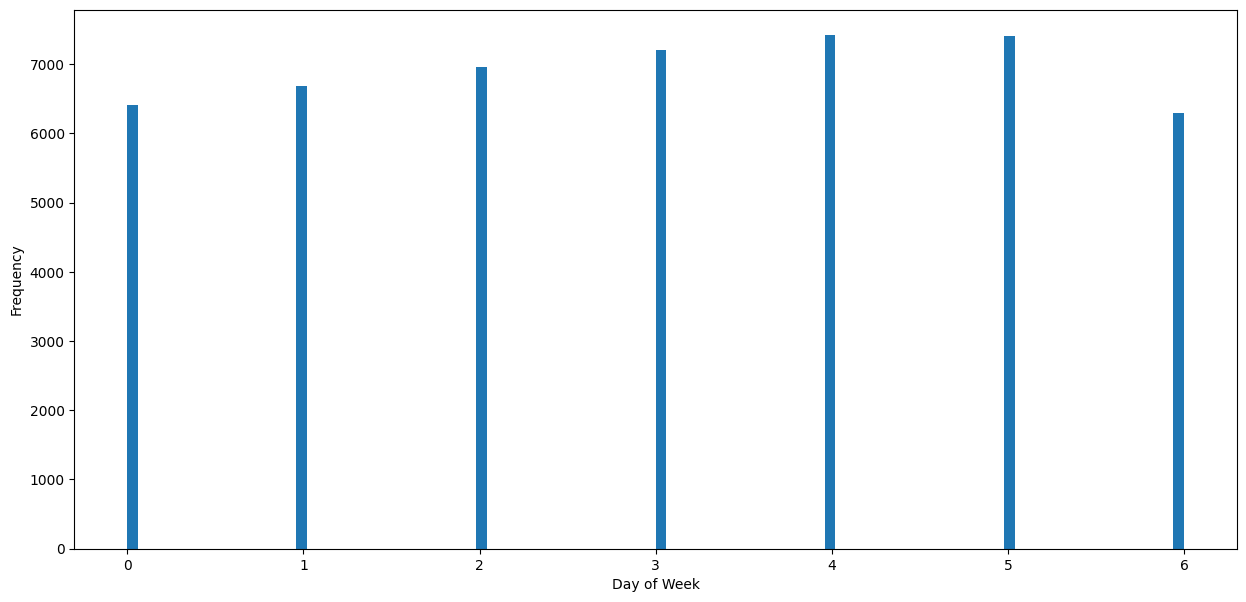

In [234]:
plt.figure(figsize=(15,7))
plt.hist(data['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
#0 means Saturday

 #Day of the week doesn't seem to have the effect on the number of cab rides

**Test Data**

In [124]:
test_data=pd.read_csv("TaxiFare.csv")
test_data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [235]:
current_directory = os.getcwd()

# List the contents of the current directory
print(os.listdir(current_directory))

['.config', 'submission_K_39k_300_15_9.csv', 'TaxiFare.csv', 'final_submission.csv', 'sample_data']


In [236]:
test_data.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [237]:
print(test_data.head())
print(test_data.columns)

   amount      date_time_of_pickup  longitude_of_pickup  latitude_of_pickup  \
0     4.5  2009-06-15 17:26:21 UTC           -73.844311           40.721319   
1    16.9  2010-01-05 16:52:16 UTC           -74.016048           40.711303   
2     5.7  2011-08-18 00:35:00 UTC           -73.982738           40.761270   
3     7.7  2012-04-21 04:30:42 UTC           -73.987130           40.733143   
4     5.3  2010-03-09 07:51:00 UTC           -73.968095           40.768008   

   longitude_of_dropoff  latitude_of_dropoff  no_of_passenger  
0            -73.841610            40.712278                1  
1            -73.979268            40.782004                1  
2            -73.991242            40.750562                2  
3            -73.991567            40.758092                1  
4            -73.956655            40.783762                1  
Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
  

Convert key and pickup_datetime to correct format

In [238]:
test_data['date_time_of_pickup'] = pd.to_datetime(test_data['date_time_of_pickup'], infer_datetime_format=True)


In [239]:
test_data.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [240]:
test_data['year'] = test_data['date_time_of_pickup'].dt.year
test_data['Month'] = test_data['date_time_of_pickup'].dt.month
test_data['Date'] = test_data['date_time_of_pickup'].dt.day
test_data['Day of Week'] = test_data['date_time_of_pickup'].dt.dayofweek
test_data['Hour'] = test_data['date_time_of_pickup'].dt.hour
test_data['Minute'] = test_data['date_time_of_pickup'].dt.minute

In [241]:
test_data.head(3)

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,Month,Date,Day of Week,Hour,Minute
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35


In [242]:
test_data.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
year                    0
Month                   0
Date                    0
Day of Week             0
Hour                    0
Minute                  0
dtype: int64

In [253]:
from math import radians, cos, sin, asin, sqrt,atan2
def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [254]:
def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    R = 6371  # Radius of the Earth in kilometers
    distance = R * c

    return distance

In [297]:
import pandas as pd
import xgboost
from math import radians, sin, cos, sqrt, atan2

# Load your data into a DataFrame, assuming it is named 'data'
data = pd.read_csv("TaxiFare.csv")  # Replace "your_data.csv" with the actual path to your dataset
 # this again is read because down condition was showing error
# Drop irrelevant columns and non-numeric columns
data.drop(['unique_id', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'], axis=1, inplace=True)

# Convert categorical columns to numerical representation if any
# Define the features 'X' by dropping the target variable 'amount'
X = data.drop(['amount'], axis=1)

# Define the target variable 'y'
y = data['amount']

# Create and fit the XGBoost model
Regression_xgboost = xgboost.XGBRegressor(n_estimators=300, max_depth=15, max_leaves=9, random_state=0)
Regression_xgboost.fit(X, y)

# Calculate the 'distance' using the haversine function and add it as a new column
def haversine(row):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [row['longitude_of_pickup'], row['latitude_of_pickup'], row['longitude_of_dropoff'], row['latitude_of_dropoff']])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c  # Earth's radius in kilometers
    return distance

test_data['distance'] = test_data.apply(haversine, axis=1)

# Define 'X_test' as the features for the test data (including the newly added 'distance' column)
X_test = test_data.drop(['amount'], axis=1)

# Reindex the columns of X_test to match X
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Make predictions on the test data using the trained model
y_test_pred = Regression_xgboost.predict(X_test)

# Print the predicted amounts for the test data
print(y_test_pred)


[11.210227 11.210227 12.01332  ... 11.210227 12.01332  11.210227]


In [258]:
#test_data[test_data.distance==0]

In [259]:
test_data.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'year', 'Month', 'Date', 'Day of Week', 'Hour',
       'Minute'],
      dtype='object')

**Machine Learning Algorithm**

Train data

In [260]:
data.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [264]:
#drop date_time_of_pickup as we can't use directly in our model
print(data.shape)
data=data.drop('date_time_of_pickup',axis=1)
print(data.shape)

(50000, 8)
(50000, 7)


In [265]:
data.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [266]:
data.iloc[:,:].head(1)

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,-73.844311,40.721319,-73.84161,40.712278,1


In [271]:
X = data.drop(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger'], axis=1)
# Assuming 'fare_amount' is the first column, select it as the target variable 'y'
y = data.iloc[:, 0].values


In [272]:
X.shape

(50000, 0)

In [273]:
y.shape

(50000,)

#to check accuracy

In [274]:
#from sklearn.model_selection import train_test_split
#train_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)

In [275]:
#from sklearn.ensemble  import RandomForestRegressor
#Regression =RandomForestRegressor(random_state=0)
#Regression.fit(train_X,train_y)
#y_pred=Regression.predict(val_X)

In [276]:
#import xgboost
#Regression_xgbooost =xgboost.XGBRegressor(n_estimator=201,max_depth=17,random_state=0)
#Regression_xgbooost.fit(train_X,train_y)
#y_pred=Regression_xgbooost.predict(val_X)

In [277]:
#from sklearn.metrics import mean_absolute_error
#print(mean_absolute_error(val_y,y_pred))

test_data

In [278]:
X_test=test_data
print(X_test.columns)
print(X_test.shape)
print(X_test.dtypes)

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'year', 'Month', 'Date', 'Day of Week', 'Hour',
       'Minute'],
      dtype='object')
(49999, 13)
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
year                                  int64
Month                                 int64
Date                                  int64
Day of Week                           int64
Hour                                  int64
Minute                                int64
dtype: object


In [319]:
print(test_data.columns)


Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'year', 'Month', 'Date', 'Day of Week', 'Hour',
       'Minute', 'distance'],
      dtype='object')


In [318]:
from math import radians, sin, cos, sqrt, atan2

def haversine(coord1, coord2):
    # Convert coordinates from decimal degrees to radians
    lon1, lat1 = map(radians, coord1)
    lon2, lat2 = map(radians, coord2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    r = 6371  # Radius of Earth in kilometers
    distance = r * c

    return distance

test_data['distance'] = test_data.apply(lambda row: haversine(
    (row['longitude_of_pickup'], row['latitude_of_pickup']),
    (row['longitude_of_dropoff'], row['latitude_of_dropoff'])
), axis=1)


In [317]:
print(X_test.shape)
print(X_test.dtypes)

(49999, 13)
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
year                                  int64
Month                                 int64
Date                                  int64
Day of Week                           int64
Hour                                  int64
Minute                                int64
distance                              int64
dtype: object


In [316]:
#from sklearn.ensemble  import RandomForestRegressor
#Regression =RandomForestRegressor(n_estimators=70,min_samples_leaf=5,random_state=0)
#Regression.fit(X,y)
#y_test_pred=Regression.predict(X_test)
#print(y_test_pred)

In [339]:
import xgboost

# Assuming you have your training data and test data (X_train, y_train, X_test)
# Replace X_train and y_train with your actual training data

# Placeholder data for demonstration purposes
X_train = train_data[['no_of_passenger']]
y_train = train_data['amount']  # Replace 'target_column' with the actual name of your target column

# Initialize an XGBoost regression model
Regression_xgbooost = xgboost.XGBRegressor(n_estimators=300, max_depth=15, max_leaves=9, random_state=0)

# Fit the XGBoost model to the training data
Regression_xgbooost.fit(X_train, y_train)

# Verify the shape of X_test and X_train
print("Shape of X_test:", X_test.shape)
print("Shape of X_train:", X_train.shape)

# Select only the relevant features from X_test
X_test_selected = X_test[['no_of_passenger']]

# Make predictions using the XGBoost model with the selected features
y_test_pred = Regression_xgbooost.predict(X_test_selected)

print(y_test_pred)


Shape of X_test: (49999, 12)
Shape of X_train: (49999, 1)
[11.210455 11.210455 12.01332  ... 11.210455 12.01332  11.210455]


In [334]:
print("Shape of X_test:", X_test.shape)
print("Shape of X:", X.shape)

Shape of X_test: (49999, 12)
Shape of X: (50000, 1)


In [335]:
print("Data type of X_test:", X_test.dtypes)
print("Data type of X:", X.dtypes)


Data type of X_test: longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
year                      int64
Month                     int64
Date                      int64
Day of Week               int64
Hour                      int64
Minute                    int64
distance                  int64
dtype: object
Data type of X: no_of_passenger    int64
dtype: object


In [309]:
print(X.columns)
print(X_test.columns)

Index(['longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff',
       'latitude_of_dropoff', 'no_of_passenger'],
      dtype='object')
Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'year', 'Month', 'Date', 'Day of Week', 'Hour', 'Minute', 'distance'],
      dtype='object')


In [330]:
print(set(X.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X.columns))


set()
{'year', 'Hour', 'distance', 'Date', 'longitude_of_pickup', 'Day of Week', 'longitude_of_dropoff', 'latitude_of_pickup', 'Minute', 'Month', 'latitude_of_dropoff'}


In [331]:
# List all the column names in the DataFrame to find the correct name of the target variable
print(data.columns)

Index(['amount', 'no_of_passenger'], dtype='object')


In [148]:
print(train_data.columns)


Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')


**submission**

In [160]:
submission = pd.read_csv('TaxiFare.csv')
submission['fare_amount'] = y_test_pred
submission.to_csv('final_submission.csv', index=False)
submission

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,fare_amount
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,4.593811
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,16.966515
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,5.903564
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,8.131226
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,5.564508
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1,14.962884
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1,7.019881
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1,6.897265
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2,4.607043


---------------------------

In [161]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y =train_test_split(X,y,test_size=0.2,random_state=0)

In [162]:
import xgboost
Regression_xgbooost =xgboost.XGBRegressor(n_estimators=300,max_depth=15,max_leaves=9,random_state=0)
Regression_xgbooost.fit(train_X,train_y)
y_pred=Regression_xgbooost.predict(val_X)

In [298]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y,y_pred))

2.4035081811097863
